# American Sign Language

American Sign Language (ASL) is a complete, complex language that employs signs made by moving the hands combined with facial expressions and postures of the body. It is the primary language of many North Americans who are deaf and is one of several communication options used by people who are deaf or hard-of-hearing.

The hand gestures representing English alphabets are shown below. This excercise focuses on classifying a subset of these hand gesture images using convolutional neural networks. Specifically, given an image of a hand showing one of the letters A-I, we want to detect which letter is being represented.

![](https://drive.google.com/uc?export=view&id=1C8r-cwHSbpK2bD4n-00XzKhwuPN1ZOQv)

## Data Loading
The data for this excercise is present in "[asl_data.zip](https://www.dropbox.com/s/r75maq5e1vyda4g/asl_data.zip?dl=0)". The dataset contains 9 classes (images corresponding to characters A to I). For convenience, the dataset is structured in such a way that we can use TorchVision's ImageFolder dataset [(documentation)](https://pytorch.org/docs/stable/torchvision/datasets.html#torchvision.datasets.ImageFolder) rather than writing your own custom dataset loader.

In [ ]:
# Define the standard imports
from __future__ import print_function 
from __future__ import division

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np

import torchvision
from torchvision import datasets, models, transforms

import matplotlib.pyplot as plt
%matplotlib inline

import time
import os
import copy

In [ ]:
# Download the data in the current working directory
!rm -rf asl_data.zip asl_data
!wget -O asl_data.zip https://www.dropbox.com/s/r75maq5e1vyda4g/asl_data.zip?dl=0
!unzip asl_data.zip
!rm asl_data.zip

# Top level data directory. Here we assume the format of the directory conforms 
#   to the ImageFolder structure
data_dir = "./asl_data"

# Define the class label
class_dict = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I'}

--2020-11-17 09:39:36--  https://www.dropbox.com/s/r75maq5e1vyda4g/asl_data.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/r75maq5e1vyda4g/asl_data.zip [following]
--2020-11-17 09:39:36--  https://www.dropbox.com/s/raw/r75maq5e1vyda4g/asl_data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd27ab3542ee310d00008504b53.dl.dropboxusercontent.com/cd/0/inline/BDWma99cKO3CWMoAYaG--6Bb5Yz03ry3_nrOoOrDkeAEyCc3JR11xq3kqiBgxPh-MiwGQEq8AVDsrkldmtDxLPWJX4V-rDHl8b8xI87taVpBm8N3Ile03qfffLyjl_AyqZM/file# [following]
--2020-11-17 09:39:36--  https://ucd27ab3542ee310d00008504b53.dl.dropboxusercontent.com/cd/0/inline/BDWma99cKO3CWMoAYaG--6Bb5Yz03ry3_nrOoOrDkeAEyCc3JR11xq3kqiBgxPh-MiwGQEq8AVDsrkldmtDxLPWJX4V-rDHl8b8xI87taVpBm

## Visualize the data

We will now see how the sample data looks like

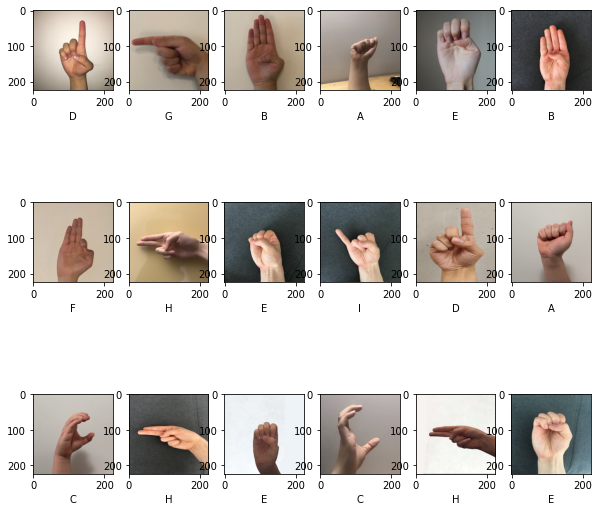

In [ ]:
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), transform=transforms.ToTensor()) for x in ['train', 'val']}
val_dataloader = torch.utils.data.DataLoader(image_datasets['val'], batch_size=1, shuffle=True)


f = plt.figure(figsize=(10, 10))
for i in range(18):
    img, label = next(iter(val_dataloader))
    img = img.squeeze().permute(1,2,0).numpy()

    plt.subplot(3,6,i+1)
    plt.imshow(img)
    plt.xlabel(class_dict[label.numpy()[0]])
    
    

# Excercise: Neural Network

In this excercise you will be using a neural network. You are free to use one of the pretrained model, as demonstrated in the previous lab, or write your own neural network from scratch.

You may use the PyTorch documentation, previous excercises and notebooks freely. You might find documentations and notebooks discussed in the last two classes helpful. However, all code and analysis that you submit must be your own.


### **Questions**
**Question 1: Model Building**

Build a multi-layered perceptron (MLP) in Pytorch that inputs  that takes the (224x224 RGB) image as input, and predicts the letter (You may need to flatten the image vector first). Your model should be a subclass of `nn.Module`. Explain your choice of neural network architecture: how many layers your network has? What types of layers does it contain? What about other decisions like use of dropout layers, activation functions, number of channels / hidden units.

**Question 2: Training Code** 

Write code to train your neural network given some training data. Your training code should make it easy to tweak hyperparameters. Make sure that you are checkpointing your models from time to time (the frequency is up to you). Explain your choice of loss function. Ensure that your code runs on GPU.


**Question 3: Overfit to a Small Dataset** 

**Part (a)**: One way to sanity check our neural network model and training code is to check whether the model is capable of overfitting a small dataset. Construct a small dataset (e.g. 1-2 image per class). Then show that your model and training code is capable of overfitting on that small dataset. You should be able to obtain a 100% training accuracy on that small dataset relatively quickly.

If your model cannot overfit the small dataset quickly, then there is a bug in either your model code and/or your training code. Fix the issues before you proceed to the next step.

**Part (b)**: Once you are done with the above part, try to reduce the effect of overfitting by using techniques discussed in the previous lecture.

**Question 4: Finetuning** 

For many image classification tasks, it is generally not a good idea to train a very large deep neural network model from scratch due to the enormous compute requirements and lack of sufficient amounts of training data.

In this part, you will use Transfer Learning to extract features from the hand gesture images. Then, train last few classification layers to use these features as input and classify the hand gestures. As you have learned in the previous lecture, you can use AlexNet architecture that is pretrained on 1000-class ImageNet dataset and finetune it for the task of understanding American sign language.

**Question 5: Report result** 

Train your new network, including any hyperparameter tuning. Plot and submit the training and validation loss and accuracy of your best model only. Along with it, also submit the final validation accuracy achieved by your model.


Number of training images: 20
Number of validation images: 910
Number of test images: 931
2
6
1
4
7
8
8
0
2
5
6
0
5
2
2
8
2
1
3
1


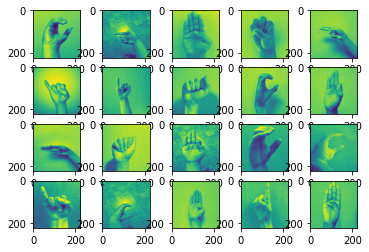

In [ ]:
# import handwritten digit dataset
trainTransform  = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), transform=trainTransform) for x in ['train', 'val']}

asl_data = list(image_datasets['train'])
asl_test = list(image_datasets['train'])
np.random.seed(2)
np.random.shuffle(asl_data)
asl_train = asl_data[:20]
asl_val = asl_data[20:-1]

print('Number of training images: {}'.format(len(asl_train)))
print('Number of validation images: {}'.format(len(asl_val)))
print('Number of test images: {}'.format(len(asl_test)))

# plot the first 18 images in the training data
for k, (image, label) in enumerate(asl_train[:20]):
    plt.subplot(4, 5, k+1)
    plt.imshow(image[0])
    print(label)

In [ ]:
### Write your code here ###
class ASLClassifier(nn.Module):
    def __init__(self):
        super(ASLClassifier, self).__init__()
        self.layer1 = nn.Linear(224*224*3, 500)
        self.layer2 = nn.Linear(500, 50)
        self.layer3 = nn.Linear(50, 9)
        # self.dropout1 = nn.Dropout(0.4) # drop out layer with 40% dropped out neuron
        # self.dropout2 = nn.Dropout(0.4)
        # self.dropout3 = nn.Dropout(0.4)        
    def forward(self, img):
        flattened = img.view(-1, 224*224*3)
        activation1 = F.tanh(self.layer1(flattened))
        activation2 = F.tanh(self.layer2(activation1))
        output = self.layer3(activation2)
        return output

In [ ]:
def trainval(model, train_data, valid_data, device, batch_size=20, num_iters=1, learn_rate=0.01, weight_decay=0):
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True) # shuffle after every epoch
    val_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learn_rate, momentum=0.9, weight_decay=weight_decay)

    iters, losses, val_losses, train_acc, val_acc = [], [], [], [], []

    # training
    n = 0 # the number of iterations
    for n in range(num_iters):
        for imgs, labels in train_loader:
            imgs, labels = imgs.to(device), labels.to(device)

            model.train() #*****************************#
            optimizer.zero_grad()         # a clean up step for PyTorch
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter

            # save the current training information
            if n % 10 == 9:
                iters.append(n)
                losses.append(float(loss)/batch_size)        # compute *average* loss
                train_accuracy = get_accuracy(model, train_data, device)
                val_accuracy = get_accuracy(model, valid_data, device)
                for im, lb in val_loader:
                    im, lb = im.to(device), lb.to(device)
                    val_out = model(im)
                    val_loss = criterion(val_out, lb)
                val_losses.append(float(val_loss)/batch_size)
                train_acc.append(train_accuracy) # compute training accuracy 
                val_acc.append(val_accuracy)   # compute validation accuracy
                print("epoch going",n+1)

    # plotting
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.plot(iters, val_losses, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")

    plt.subplot(1,2,2)
    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))


def get_accuracy(model, data, device):
    correct = 0
    total = 0

    model.eval() #*********#
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size=64):
        imgs, labels = imgs.to(device), labels.to(device)
        output = model(imgs)
        pred = output.max(1, keepdim=True)[1] # get the index of the max logit
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
        accuracy = correct / total
    return accuracy

Training the model with limited data without any technique to overcome overfitting

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


epoch going 10
epoch going 20
epoch going 30
epoch going 40
epoch going 50
epoch going 60
epoch going 70
epoch going 80
epoch going 90
epoch going 100
epoch going 110
epoch going 120
epoch going 130
epoch going 140
epoch going 150
epoch going 160
epoch going 170
epoch going 180
epoch going 190
epoch going 200
epoch going 210
epoch going 220
epoch going 230
epoch going 240
epoch going 250
epoch going 260
epoch going 270
epoch going 280
epoch going 290
epoch going 300
epoch going 310
epoch going 320
epoch going 330
epoch going 340
epoch going 350
epoch going 360
epoch going 370
epoch going 380
epoch going 390
epoch going 400
epoch going 410
epoch going 420
epoch going 430
epoch going 440
epoch going 450
epoch going 460
epoch going 470
epoch going 480
epoch going 490
epoch going 500
epoch going 510
epoch going 520
epoch going 530
epoch going 540
epoch going 550
epoch going 560
epoch going 570
epoch going 580
epoch going 590
epoch going 600
epoch going 610
epoch going 620
epoch going 630
e

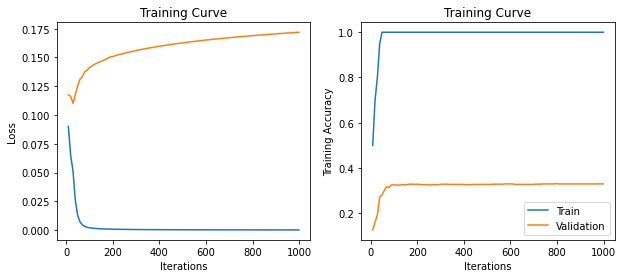

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.32967032967032966


In [ ]:
model = ASLClassifier()

# Ship data and model to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

trainval(model, asl_train, asl_val, device, num_iters=1000)

Adding Droput to reduce overfitting

In [ ]:
class ASLClassifier_Dropout(nn.Module):
    def __init__(self):
        super(ASLClassifier_Dropout, self).__init__()
        self.layer1 = nn.Linear(224*224*3, 500)
        self.layer2 = nn.Linear(500, 50)
        self.layer3 = nn.Linear(50, 9)
        self.dropout1 = nn.Dropout(0.9) # drop out layer with 50% dropped out neuron
        self.dropout2 = nn.Dropout(0.6)
        self.dropout3 = nn.Dropout(0.3)        
    def forward(self, img):
        flattened = img.view(-1, 224*224*3)
        activation1 = torch.tanh(self.layer1(flattened))
        activation2 = torch.tanh(self.layer2(activation1))
        output = self.layer3(activation2)
        return output

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


epoch going 10
epoch going 20
epoch going 30
epoch going 40
epoch going 50
epoch going 60
epoch going 70
epoch going 80
epoch going 90
epoch going 100
epoch going 110
epoch going 120
epoch going 130
epoch going 140
epoch going 150
epoch going 160
epoch going 170
epoch going 180
epoch going 190
epoch going 200
epoch going 210
epoch going 220
epoch going 230
epoch going 240
epoch going 250
epoch going 260
epoch going 270
epoch going 280
epoch going 290
epoch going 300
epoch going 310
epoch going 320
epoch going 330
epoch going 340
epoch going 350
epoch going 360
epoch going 370
epoch going 380
epoch going 390
epoch going 400
epoch going 410
epoch going 420
epoch going 430
epoch going 440
epoch going 450
epoch going 460
epoch going 470
epoch going 480
epoch going 490
epoch going 500
epoch going 510
epoch going 520
epoch going 530
epoch going 540
epoch going 550
epoch going 560
epoch going 570
epoch going 580
epoch going 590
epoch going 600
epoch going 610
epoch going 620
epoch going 630
e

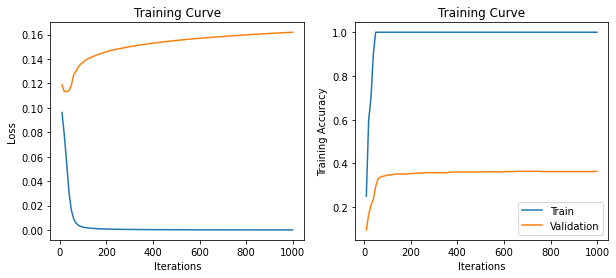

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.3637362637362637


In [ ]:
model2 = ASLClassifier_Dropout()

# Ship data and model to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model2 = model2.to(device)

trainval(model2, asl_train, asl_val, device, num_iters=1000)

Applying Dropout and Regularization for preventing overfitting

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


epoch going 10
epoch going 20
epoch going 30
epoch going 40
epoch going 50
epoch going 60
epoch going 70
epoch going 80
epoch going 90
epoch going 100
epoch going 110
epoch going 120
epoch going 130
epoch going 140
epoch going 150
epoch going 160
epoch going 170
epoch going 180
epoch going 190
epoch going 200
epoch going 210
epoch going 220
epoch going 230
epoch going 240
epoch going 250
epoch going 260
epoch going 270
epoch going 280
epoch going 290
epoch going 300
epoch going 310
epoch going 320
epoch going 330
epoch going 340
epoch going 350
epoch going 360
epoch going 370
epoch going 380
epoch going 390
epoch going 400
epoch going 410
epoch going 420
epoch going 430
epoch going 440
epoch going 450
epoch going 460
epoch going 470
epoch going 480
epoch going 490
epoch going 500
epoch going 510
epoch going 520
epoch going 530
epoch going 540
epoch going 550
epoch going 560
epoch going 570
epoch going 580
epoch going 590
epoch going 600
epoch going 610
epoch going 620
epoch going 630
e

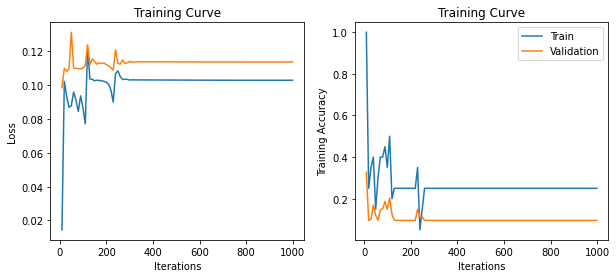

Final Training Accuracy: 0.25
Final Validation Accuracy: 0.0956043956043956


In [ ]:
trainval(model2, asl_train, asl_val, device, num_iters=1000,weight_decay=0.5)

Applying Dropout and Data Augmentation(Random Rotation)to prevent overfitting




In [ ]:
def show20(data):
    #plt.figure(figsize=(10,2))
    for n, (img, label) in enumerate(data):
        if n >= 20:
            break
        #plt.subplot(2, 10, n+1)
        #plt.imshow(img[0])
        augmented_train_data.append((img,label))
        


augmented_train_data = []

trainTransform = transforms.Compose([transforms.RandomRotation(25),
    transforms.ToTensor()])
for i in range(20):
    image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), transform=trainTransform) for x in ['train', 'val']}
    asl_new = list(image_datasets['train'])
    #asl_valnew= list(image_datasets['val'])
    np.random.seed(2)
    np.random.shuffle(asl_new)
    show20(asl_new)
print(len(augmented_train_data))    

400


epoch going 10
epoch going 20
epoch going 30
epoch going 40
epoch going 50
epoch going 60
epoch going 70
epoch going 80
epoch going 90
epoch going 100
epoch going 110
epoch going 120
epoch going 130
epoch going 140
epoch going 150
epoch going 160
epoch going 170
epoch going 180
epoch going 190
epoch going 200
epoch going 210
epoch going 220
epoch going 230
epoch going 240
epoch going 250
epoch going 260
epoch going 270
epoch going 280
epoch going 290
epoch going 300
epoch going 310
epoch going 320
epoch going 330
epoch going 340
epoch going 350
epoch going 360
epoch going 370
epoch going 380
epoch going 390
epoch going 400
epoch going 410
epoch going 420
epoch going 430
epoch going 440
epoch going 450
epoch going 460
epoch going 470
epoch going 480
epoch going 490
epoch going 500
epoch going 510
epoch going 520
epoch going 530
epoch going 540
epoch going 550
epoch going 560
epoch going 570
epoch going 580
epoch going 590
epoch going 600
epoch going 610
epoch going 620
epoch going 630
e

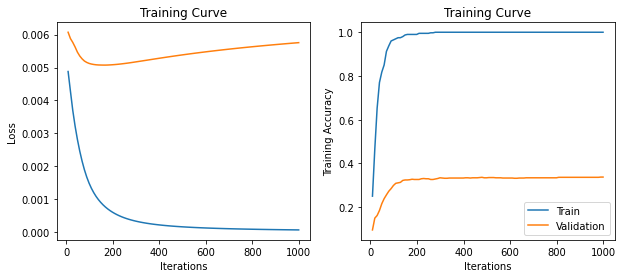

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.3373626373626374


In [ ]:
model2 = ASLClassifier_Dropout()

# Ship data and model to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model2 = model2.to(device)
trainval(model2, augmented_train_data, asl_val, device, num_iters=1000,batch_size=400,learn_rate=0.001,weight_decay=0)

Applying Dropout and Data Augmentation(Random Rotation and Gaussian Blur)to prevent overfitting

In [ ]:
def show20(data):
    #plt.figure(figsize=(10,2))
    for n, (img, label) in enumerate(data):
        if n >= 20:
            break
        #plt.subplot(2, 10, n+1)
        #plt.imshow(img[0])
        augmented_train_data2.append((img,label))
        


augmented_train_data2 = []

trainTransform = transforms.Compose([transforms.RandomRotation(25),torchvision.transforms.GaussianBlur(3, sigma=(0.1, 2.0)),
    transforms.ToTensor()])
for i in range(20):
    image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), transform=trainTransform) for x in ['train', 'val']}
    asl_new = list(image_datasets['train'])
    #asl_valnew= list(image_datasets['val'])
    np.random.seed(2)
    np.random.shuffle(asl_new)
    show20(asl_new)
print(len(augmented_train_data2))    

400


epoch going 10
epoch going 20
epoch going 30
epoch going 40
epoch going 50
epoch going 60
epoch going 70
epoch going 80
epoch going 90
epoch going 100
epoch going 110
epoch going 120
epoch going 130
epoch going 140
epoch going 150
epoch going 160
epoch going 170
epoch going 180
epoch going 190
epoch going 200
epoch going 210
epoch going 220
epoch going 230
epoch going 240
epoch going 250
epoch going 260
epoch going 270
epoch going 280
epoch going 290
epoch going 300
epoch going 310
epoch going 320
epoch going 330
epoch going 340
epoch going 350
epoch going 360
epoch going 370
epoch going 380
epoch going 390
epoch going 400
epoch going 410
epoch going 420
epoch going 430
epoch going 440
epoch going 450
epoch going 460
epoch going 470
epoch going 480
epoch going 490
epoch going 500
epoch going 510
epoch going 520
epoch going 530
epoch going 540
epoch going 550
epoch going 560
epoch going 570
epoch going 580
epoch going 590
epoch going 600
epoch going 610
epoch going 620
epoch going 630
e

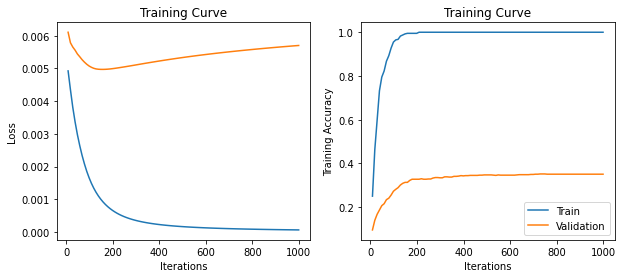

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.3505494505494505


In [ ]:
model2 = ASLClassifier_Dropout()

# Ship data and model to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model2 = model2.to(device)
trainval(model2, augmented_train_data2, asl_val, device, num_iters=1000,batch_size=400,learn_rate=0.001,weight_decay=0)

Applying Dropout,Regularization and Data Augmentation to prevent overfitting

epoch going 10
epoch going 20
epoch going 30
epoch going 40
epoch going 50
epoch going 60
epoch going 70
epoch going 80
epoch going 90
epoch going 100
epoch going 110
epoch going 120
epoch going 130
epoch going 140
epoch going 150
epoch going 160
epoch going 170
epoch going 180
epoch going 190
epoch going 200
epoch going 210
epoch going 220
epoch going 230
epoch going 240
epoch going 250
epoch going 260
epoch going 270
epoch going 280
epoch going 290
epoch going 300
epoch going 310
epoch going 320
epoch going 330
epoch going 340
epoch going 350
epoch going 360
epoch going 370
epoch going 380
epoch going 390
epoch going 400
epoch going 410
epoch going 420
epoch going 430
epoch going 440
epoch going 450
epoch going 460
epoch going 470
epoch going 480
epoch going 490
epoch going 500
epoch going 510
epoch going 520
epoch going 530
epoch going 540
epoch going 550
epoch going 560
epoch going 570
epoch going 580
epoch going 590
epoch going 600
epoch going 610
epoch going 620
epoch going 630
e

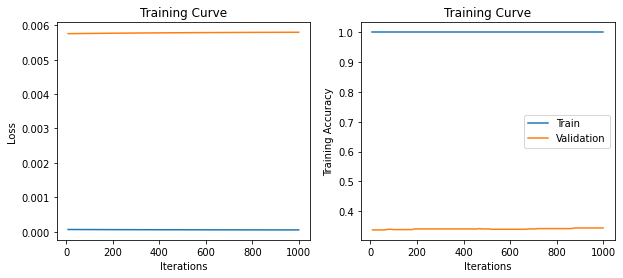

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.34395604395604396


In [ ]:
trainval(model2, augmented_train_data, asl_val, device, num_iters=1000,batch_size=400,learn_rate=0.001,weight_decay=0.01)

Applying Dropout,Regularization and Data Augmentation to prevent overfitting

epoch going 10
epoch going 20
epoch going 30
epoch going 40
epoch going 50
epoch going 60
epoch going 70
epoch going 80
epoch going 90
epoch going 100
epoch going 110
epoch going 120
epoch going 130
epoch going 140
epoch going 150
epoch going 160
epoch going 170
epoch going 180
epoch going 190
epoch going 200
epoch going 210
epoch going 220
epoch going 230
epoch going 240
epoch going 250
epoch going 260
epoch going 270
epoch going 280
epoch going 290
epoch going 300
epoch going 310
epoch going 320
epoch going 330
epoch going 340
epoch going 350
epoch going 360
epoch going 370
epoch going 380
epoch going 390
epoch going 400
epoch going 410
epoch going 420
epoch going 430
epoch going 440
epoch going 450
epoch going 460
epoch going 470
epoch going 480
epoch going 490
epoch going 500
epoch going 510
epoch going 520
epoch going 530
epoch going 540
epoch going 550
epoch going 560
epoch going 570
epoch going 580
epoch going 590
epoch going 600
epoch going 610
epoch going 620
epoch going 630
e

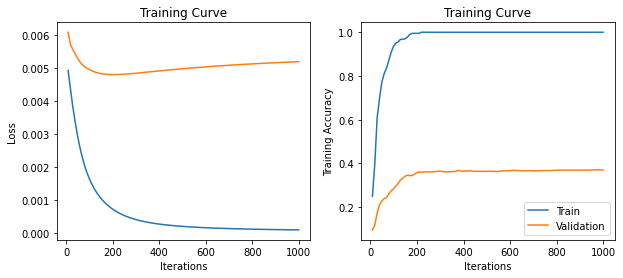

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.36923076923076925


In [ ]:
model2 = ASLClassifier_Dropout()

# Ship data and model to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model2 = model2.to(device)
trainval(model2, augmented_train_data2, asl_val, device, num_iters=1000,batch_size=400,learn_rate=0.001,weight_decay=0.01)

Finetuning with AlexNet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Top level data directory. Here we assume the format of the directory conforms 
#   to the ImageFolder structure
data_dir = "./asl_data"

# Models to choose from [resnet, alexnet, vgg, squeezenet, densenet, inception]
model_name = "alexnet"

# Number of classes in the dataset
num_classes = 9

# Batch size for training (change depending on how much memory you have)
batch_size = 20

# Number of epochs to train for 
num_epochs = 500

# Flag for feature extracting. When False, we finetune the whole model, 
#   when True we only update the reshaped layer params
feature_extract = True

In [ ]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25):
    since = time.time()

    val_acc_history = []
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'val':
                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

In [ ]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25):
    since = time.time()

    val_acc_history = []
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
          

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'val':
                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

In [ ]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

In [ ]:
def initialize_model(model_name, num_classes, feature_extract, use_pretrained=True):
    # Initialize these variables which will be set in this if statement. Each of these
    #   variables is model specific.
    model_ft = None
    input_size = 0

    """ Alexnet
    """
    model_ft = models.alexnet(pretrained=use_pretrained)
    set_parameter_requires_grad(model_ft, feature_extract)
    num_ftrs = model_ft.classifier[6].in_features
    model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
    input_size = 224
    
    return model_ft, input_size

# Initialize the model for this run
model_ft, input_size = initialize_model(model_name, num_classes, feature_extract, use_pretrained=True)

# Print the model we just instantiated
print(model_ft)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(input_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

print("Initializing Datasets and Dataloaders...")

# Create training and validation datasets
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
# Create training and validation dataloaders
dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'val']}

# Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Initializing Datasets and Dataloaders...


In [ ]:
# Send the model to GPU
model_ft = model_ft.to(device)

# Gather the parameters to be optimized/updated in this run. If we are
#  finetuning we will be updating all parameters. However, if we are 
#  doing feature extract method, we will only update the parameters
#  that we have just initialized, i.e. the parameters with requires_grad
#  is True.
params_to_update = model_ft.parameters()
print("Params to learn:")
if feature_extract:
    params_to_update = []
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)
else:
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(params_to_update, lr=0.01, momentum=0.99)

Params to learn:
	 classifier.6.weight
	 classifier.6.bias


In [ ]:
# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Train and evaluate
model_ft, hist = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs)

Epoch 0/499
----------
train Loss: 16.1492 Acc: 0.3158
val Loss: 16.9668 Acc: 0.4784

Epoch 1/499
----------
train Loss: 26.2739 Acc: 0.4619
val Loss: 19.1315 Acc: 0.6293

Epoch 2/499
----------
train Loss: 31.1816 Acc: 0.4962
val Loss: 26.8440 Acc: 0.6336

Epoch 3/499
----------
train Loss: 33.9760 Acc: 0.5478
val Loss: 28.4604 Acc: 0.6078

Epoch 4/499
----------
train Loss: 36.7102 Acc: 0.5166
val Loss: 37.0198 Acc: 0.5948

Epoch 5/499
----------
train Loss: 41.2459 Acc: 0.5381
val Loss: 43.7933 Acc: 0.6250

Epoch 6/499
----------
train Loss: 43.9445 Acc: 0.5381
val Loss: 56.4737 Acc: 0.5948

Epoch 7/499
----------
train Loss: 42.7433 Acc: 0.5714
val Loss: 64.2713 Acc: 0.5560

Epoch 8/499
----------
train Loss: 49.9442 Acc: 0.5639
val Loss: 60.3015 Acc: 0.5560

Epoch 9/499
----------
train Loss: 45.6379 Acc: 0.5693
val Loss: 64.7292 Acc: 0.5905

Epoch 10/499
----------
train Loss: 45.2865 Acc: 0.5768
val Loss: 66.7732 Acc: 0.5948

Epoch 11/499
----------
train Loss: 52.9543 Acc: 0.56